In [73]:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [74]:
# Twitter App access keys for @user

# Consume:
CONSUMER_KEY    = 'xabxdefgh......'
CONSUMER_SECRET = 'abcdef.........'


# Access:
ACCESS_TOKEN  = '123456-WGpWArWvozAuyEwxTOqkKRBUtBoKLClqJ3Q64hT'
ACCESS_SECRET = 'xxxxxxxxxxxxxxxxxxxxx'

In [75]:
# We import our access keys:
from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [160]:
extractor = twitter_setup()

# We create a tweet list as follows:
#tweets = extractor.search(q="#RILAGM", count=200)
tweets = extractor.user_timeline(screen_name="narendramodi", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

Birthday greetings to my valued colleague and one of India’s senior most leaders, Shri Ram Vilas Paswan Ji. A true… https://t.co/QWuBREKN15

A promise fulfilled!

We are honoured and humbled that we had the opportunity to take a decision on the historic in… https://t.co/b5io3aG5fs

Strengthening India’s higher education sector. https://t.co/bXYsZAboIx

Congratulations to the people of Tripura! Their long pending demand was fulfilled today. https://t.co/P1ebzWl7zU

Great interaction with young IAS officers who have recently been appointed Assistant Secretaries in the Government… https://t.co/UewAES5iwg



In [161]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,Birthday greetings to my valued colleague and ...
1,A promise fulfilled!\n\nWe are honoured and hu...
2,Strengthening India’s higher education sector....
3,Congratulations to the people of Tripura! Thei...
4,Great interaction with young IAS officers who ...
5,"मिट्टी के स्वास्थ्य से लेकर सिंचाई तक, आसानी स..."
6,We are leaving no stone unturned to ensure the...
7,Well said. I fully agree that when India’s far...
8,कृषि क्षेत्र के विकास और किसान कल्याण के लिए ज...
9,मुझे अत्यंत खुशी हो रही है कि किसान भाइयों-बहन...


In [162]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [163]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1014701594041085953
2018-07-05 02:44:46
Twitter for iPhone
8598
1461
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/QWuBREKN15', 'expanded_url': 'https://twitter.com/i/web/status/1014701594041085953', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]}


In [164]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [165]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,Birthday greetings to my valued colleague and ...,139,1014701594041085953,2018-07-05 02:44:46,Twitter for iPhone,8598,1461
1,A promise fulfilled!\n\nWe are honoured and hu...,140,1014517413776199681,2018-07-04 14:32:54,Twitter Web Client,13162,3804
2,Strengthening India’s higher education sector....,70,1014517151854575617,2018-07-04 14:31:52,Twitter Web Client,6346,1415
3,Congratulations to the people of Tripura! Thei...,112,1014517090261168128,2018-07-04 14:31:37,Twitter Web Client,7705,1993
4,Great interaction with young IAS officers who ...,139,1014516811541372928,2018-07-04 14:30:31,Twitter Web Client,4066,1128
5,"मिट्टी के स्वास्थ्य से लेकर सिंचाई तक, आसानी स...",140,1014516392417062912,2018-07-04 14:28:51,Twitter Web Client,5591,1516
6,We are leaving no stone unturned to ensure the...,96,1014516295583191040,2018-07-04 14:28:28,Twitter Web Client,3382,929
7,Well said. I fully agree that when India’s far...,104,1014516115790163968,2018-07-04 14:27:45,Twitter Web Client,3983,992
8,कृषि क्षेत्र के विकास और किसान कल्याण के लिए ज...,140,1014436056257744897,2018-07-04 09:09:37,Twitter for iPhone,17849,4340
9,मुझे अत्यंत खुशी हो रही है कि किसान भाइयों-बहन...,138,1014435806700867585,2018-07-04 09:08:38,Twitter for iPhone,31527,9162


In [166]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 131.55


In [167]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
Birthday greetings to Congress President Shri @RahulGandhi. I pray for his long and healthy life.
Number of likes: 39286
97 characters.

The tweet with more retweets is: 
मुझे अत्यंत खुशी हो रही है कि किसान भाइयों-बहनों को सरकार ने लागत के 1.5 गुना MSP देने का जो वादा किया था, आज उसे… https://t.co/WHTpSGhWVW
Number of retweets: 9162
138 characters.



In [168]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

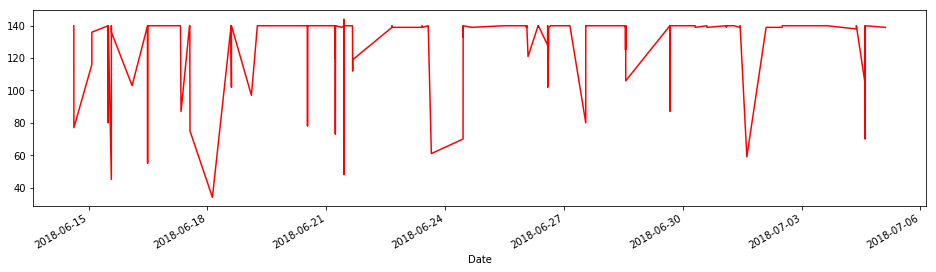

In [169]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

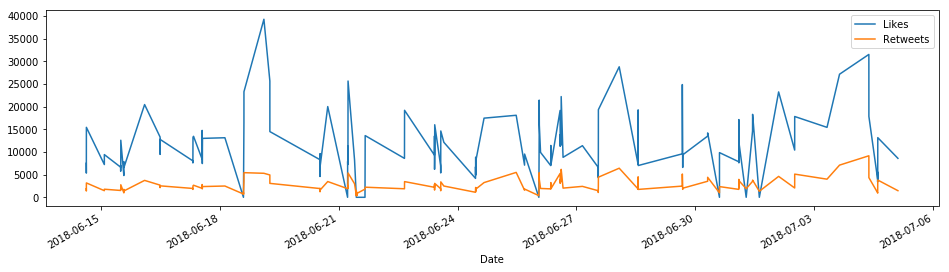

In [170]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [171]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone
* Twitter Web Client
* Twitter for Android
* Media Studio


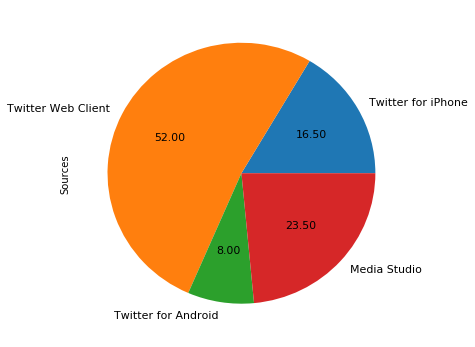

In [172]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [173]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [174]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,Birthday greetings to my valued colleague and ...,139,1014701594041085953,2018-07-05 02:44:46,Twitter for iPhone,8598,1461,1
1,A promise fulfilled!\n\nWe are honoured and hu...,140,1014517413776199681,2018-07-04 14:32:54,Twitter Web Client,13162,3804,0
2,Strengthening India’s higher education sector....,70,1014517151854575617,2018-07-04 14:31:52,Twitter Web Client,6346,1415,1
3,Congratulations to the people of Tripura! Thei...,112,1014517090261168128,2018-07-04 14:31:37,Twitter Web Client,7705,1993,-1
4,Great interaction with young IAS officers who ...,139,1014516811541372928,2018-07-04 14:30:31,Twitter Web Client,4066,1128,1
5,"मिट्टी के स्वास्थ्य से लेकर सिंचाई तक, आसानी स...",140,1014516392417062912,2018-07-04 14:28:51,Twitter Web Client,5591,1516,0
6,We are leaving no stone unturned to ensure the...,96,1014516295583191040,2018-07-04 14:28:28,Twitter Web Client,3382,929,0
7,Well said. I fully agree that when India’s far...,104,1014516115790163968,2018-07-04 14:27:45,Twitter Web Client,3983,992,0
8,कृषि क्षेत्र के विकास और किसान कल्याण के लिए ज...,140,1014436056257744897,2018-07-04 09:09:37,Twitter for iPhone,17849,4340,0
9,मुझे अत्यंत खुशी हो रही है कि किसान भाइयों-बहन...,138,1014435806700867585,2018-07-04 09:08:38,Twitter for iPhone,31527,9162,0


In [175]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [176]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 41.5%
Percentage of neutral tweets: 55.0%
Percentage de negative tweets: 3.5%
